In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")


# Training data preparation 

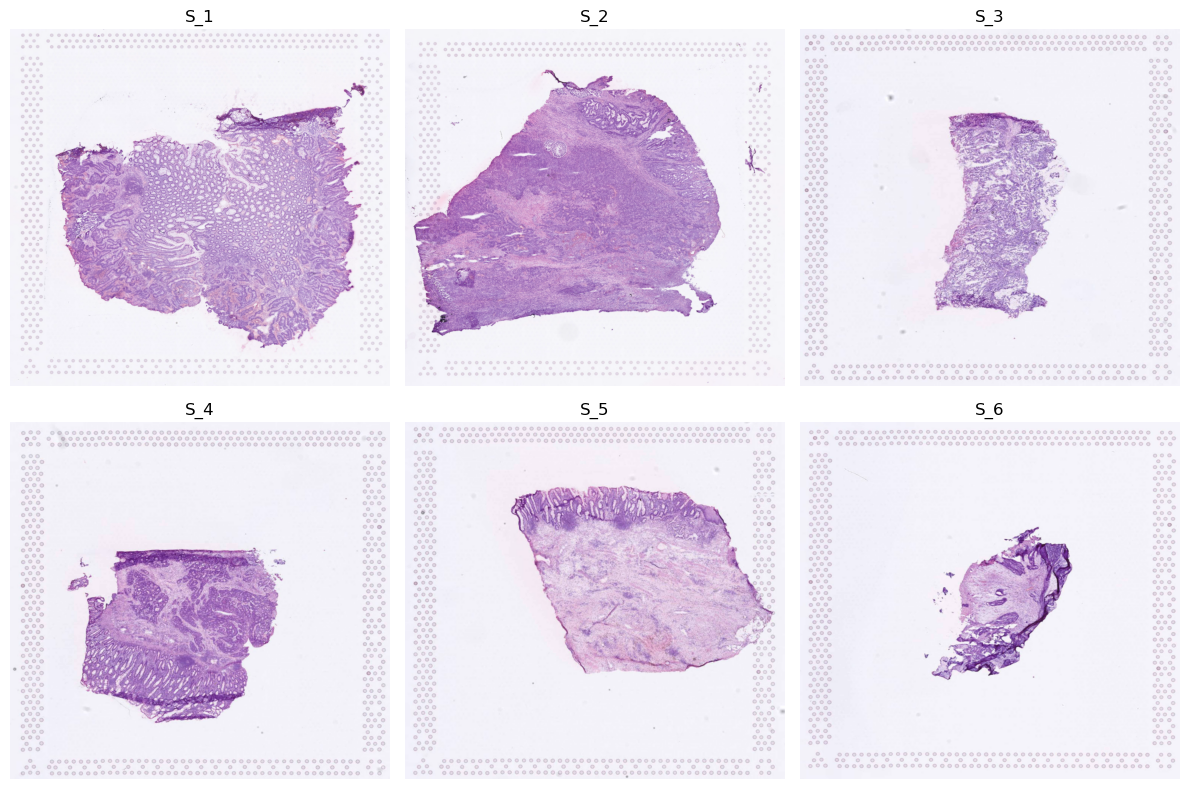

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file and load the Train images and spots datasets
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]

    # Get a list of all sample keys (slide identifiers)
    samples = list(train_images.keys())
    n_samples = len(samples)
    
    # Determine grid size (roughly square)
    cols = math.ceil(math.sqrt(n_samples))
    rows = math.ceil(n_samples / cols)
    
    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    # In case there's only one subplot, make it iterable
    axs = axs.flatten() if n_samples > 1 else [axs]
    
    # Loop through each sample and plot the corresponding data
    for ax, sample in zip(axs, samples):
        image = np.array(train_images[sample])
        spots = np.array(train_spots[sample])
        x, y = spots["x"], spots["y"]

        ax.imshow(image, aspect="auto")
        ax.scatter(x, y, color="red", s=1, alpha=0.4)
        ax.axis('off')
        ax.set_title(sample)
        
    # Hide any unused subplots (if the grid is larger than needed)
    for ax in axs[len(samples):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


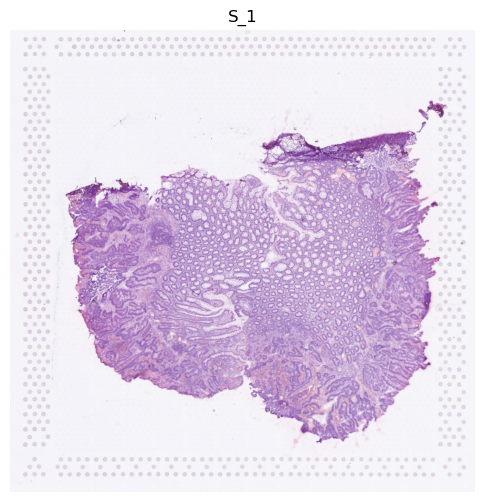

In [6]:
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_1'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    
    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    #plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

## Training data augmentation

In [13]:

# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("dataset/spots-data/version-5/no_clip_gu_processed_train_spots.h5", "r") as f:
    train_spots = f["spots/log2_Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df
        print(slide_name)

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

S_1
S_2
S_3
S_4
S_5
S_6


x     y  zscore_log2_filtered_C1  zscore_log2_filtered_C2  \
0     1554  1297                -0.603246                -0.435053   
1      462  1502                -0.472097                 0.537761   
2     1488  1548                -0.451260                -0.597028   
3     1725  1182                -0.507545                 0.783093   
4      581  1113                -0.457100                -0.369337   
...    ...   ...                      ...                      ...   
2144  1055   701                -0.559557                -0.035907   
2145  1225   862                -0.529086                 0.010395   
2146   765  1479                -0.379121                -0.505304   
2147   607  1525                -0.618791                 0.235444   
2148   568  1181                -0.622537                -0.836224   

      zscore_log2_filtered_C3  zscore_log2_filtered_C4  \
0                   -0.570764                -0.523795   
1                   -0.435851                -0.440353   
2                   -0.509482                -0.520947   
3                   -0.465677                -0.498563   
4                   -0.452923                -0.431558   
...                       ...                      ...   
2144                -0.523094                -0.522988   
2145                -0.318391                -0.524762   
2146                -0.379173                -0.521146   
2147                -0.580484                -0.527196   
2148                -0.603911                -0.520632   

      zscore_log2_filtered_C5  zscore_log2_filtered_C6  \
0                   -0.099760                 3.204404   
1                    2.367270                -0.435736   
2                    0.435508                -0.426691   
3                    3.032796                 0.061907   
4                    1.693930                -0.459043   
...                       ...                      ...   
2144                -0.822538                 0.859183   
2145                -0.817576                 1.381010   
2146                -0.633435                -0.462212   
2147                 0.625895                -0.462452   
2148                 0.239728                -0.462955   

      zscore_log2_filtered_C7  zscore_log2_filtered_C8  ...  \
0                   -0.510432                 0.094953  ...   
1                    0.704734                -0.239895  ...   
2                   -0.606394                -0.269383  ...   
3                    1.986766                -0.084806  ...   
4                   -0.331140                -0.262851  ...   
...                       ...                      ...  ...   
2144                -0.051017                -0.025274  ...   
2145                -0.164811                -0.196401  ...   
2146                -0.666774                -0.270042  ...   
2147                -0.449127                -0.248086  ...   
2148                -0.689128                -0.271428  ...   

      zscore_log2_filtered_C26  zscore_log2_filtered_C27  \
0                    -0.305204                  2.848441   
1                    -0.308130                 -0.437272   
2                    -0.313622                 -0.065456   
3                    -0.296417                 -0.084218   
4                    -0.313842                 -0.462315   
...                        ...                       ...   
2144                 -0.245349                  0.840260   
2145                 -0.022436                  1.037405   
2146                 -0.312083                 -0.479030   
2147                 -0.301817                 -0.468716   
2148                 -0.314497                 -0.475171   

      zscore_log2_filtered_C28  zscore_log2_filtered_C29  \
0                     1.402928                 -0.296408   
1                    -0.349912                 -0.190341   
2                    -0.332085                 -0.339042   
3                    -0.322369                 -0.046703

## Smooth spots

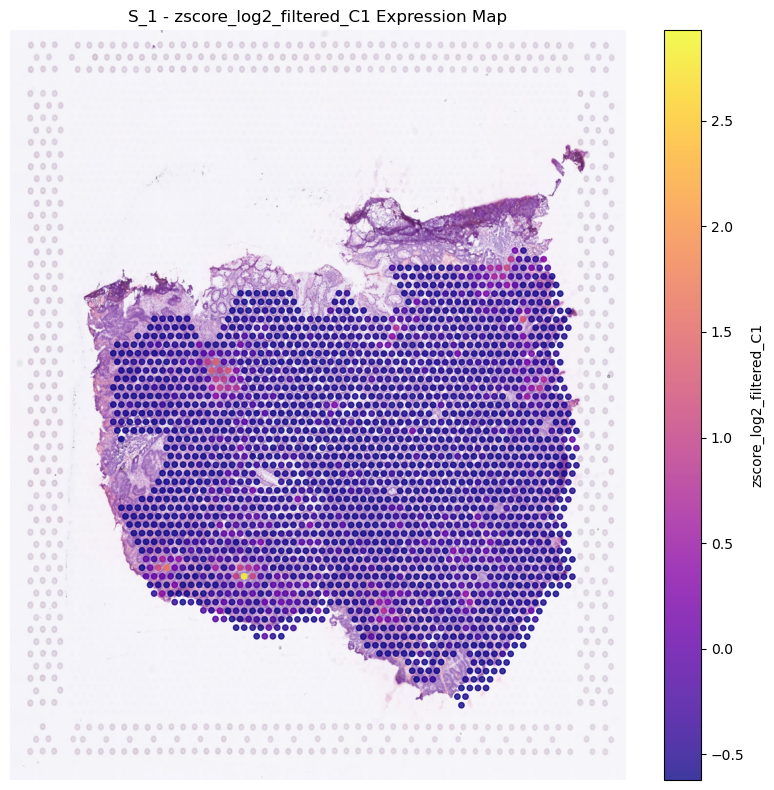

In [2]:
from python_scripts.expression_plot_utils import plot_cell_expression_on_slide
plot_cell_expression_on_slide(
    slide_id = "S_1",
    cell_type = "C1",
    cell_prefix="zscore_log2_filtered_",  # or zscore_boxcox_filtered_
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path="dataset/spots-data/version-5/no_clip_gu_processed_train_spots.h5",
    group_name="log2_Train"
)

/Users/deweywang/Desktop/GitHub/HEVisum/python_scripts/expression_plot_utils.py:241: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 0.97])


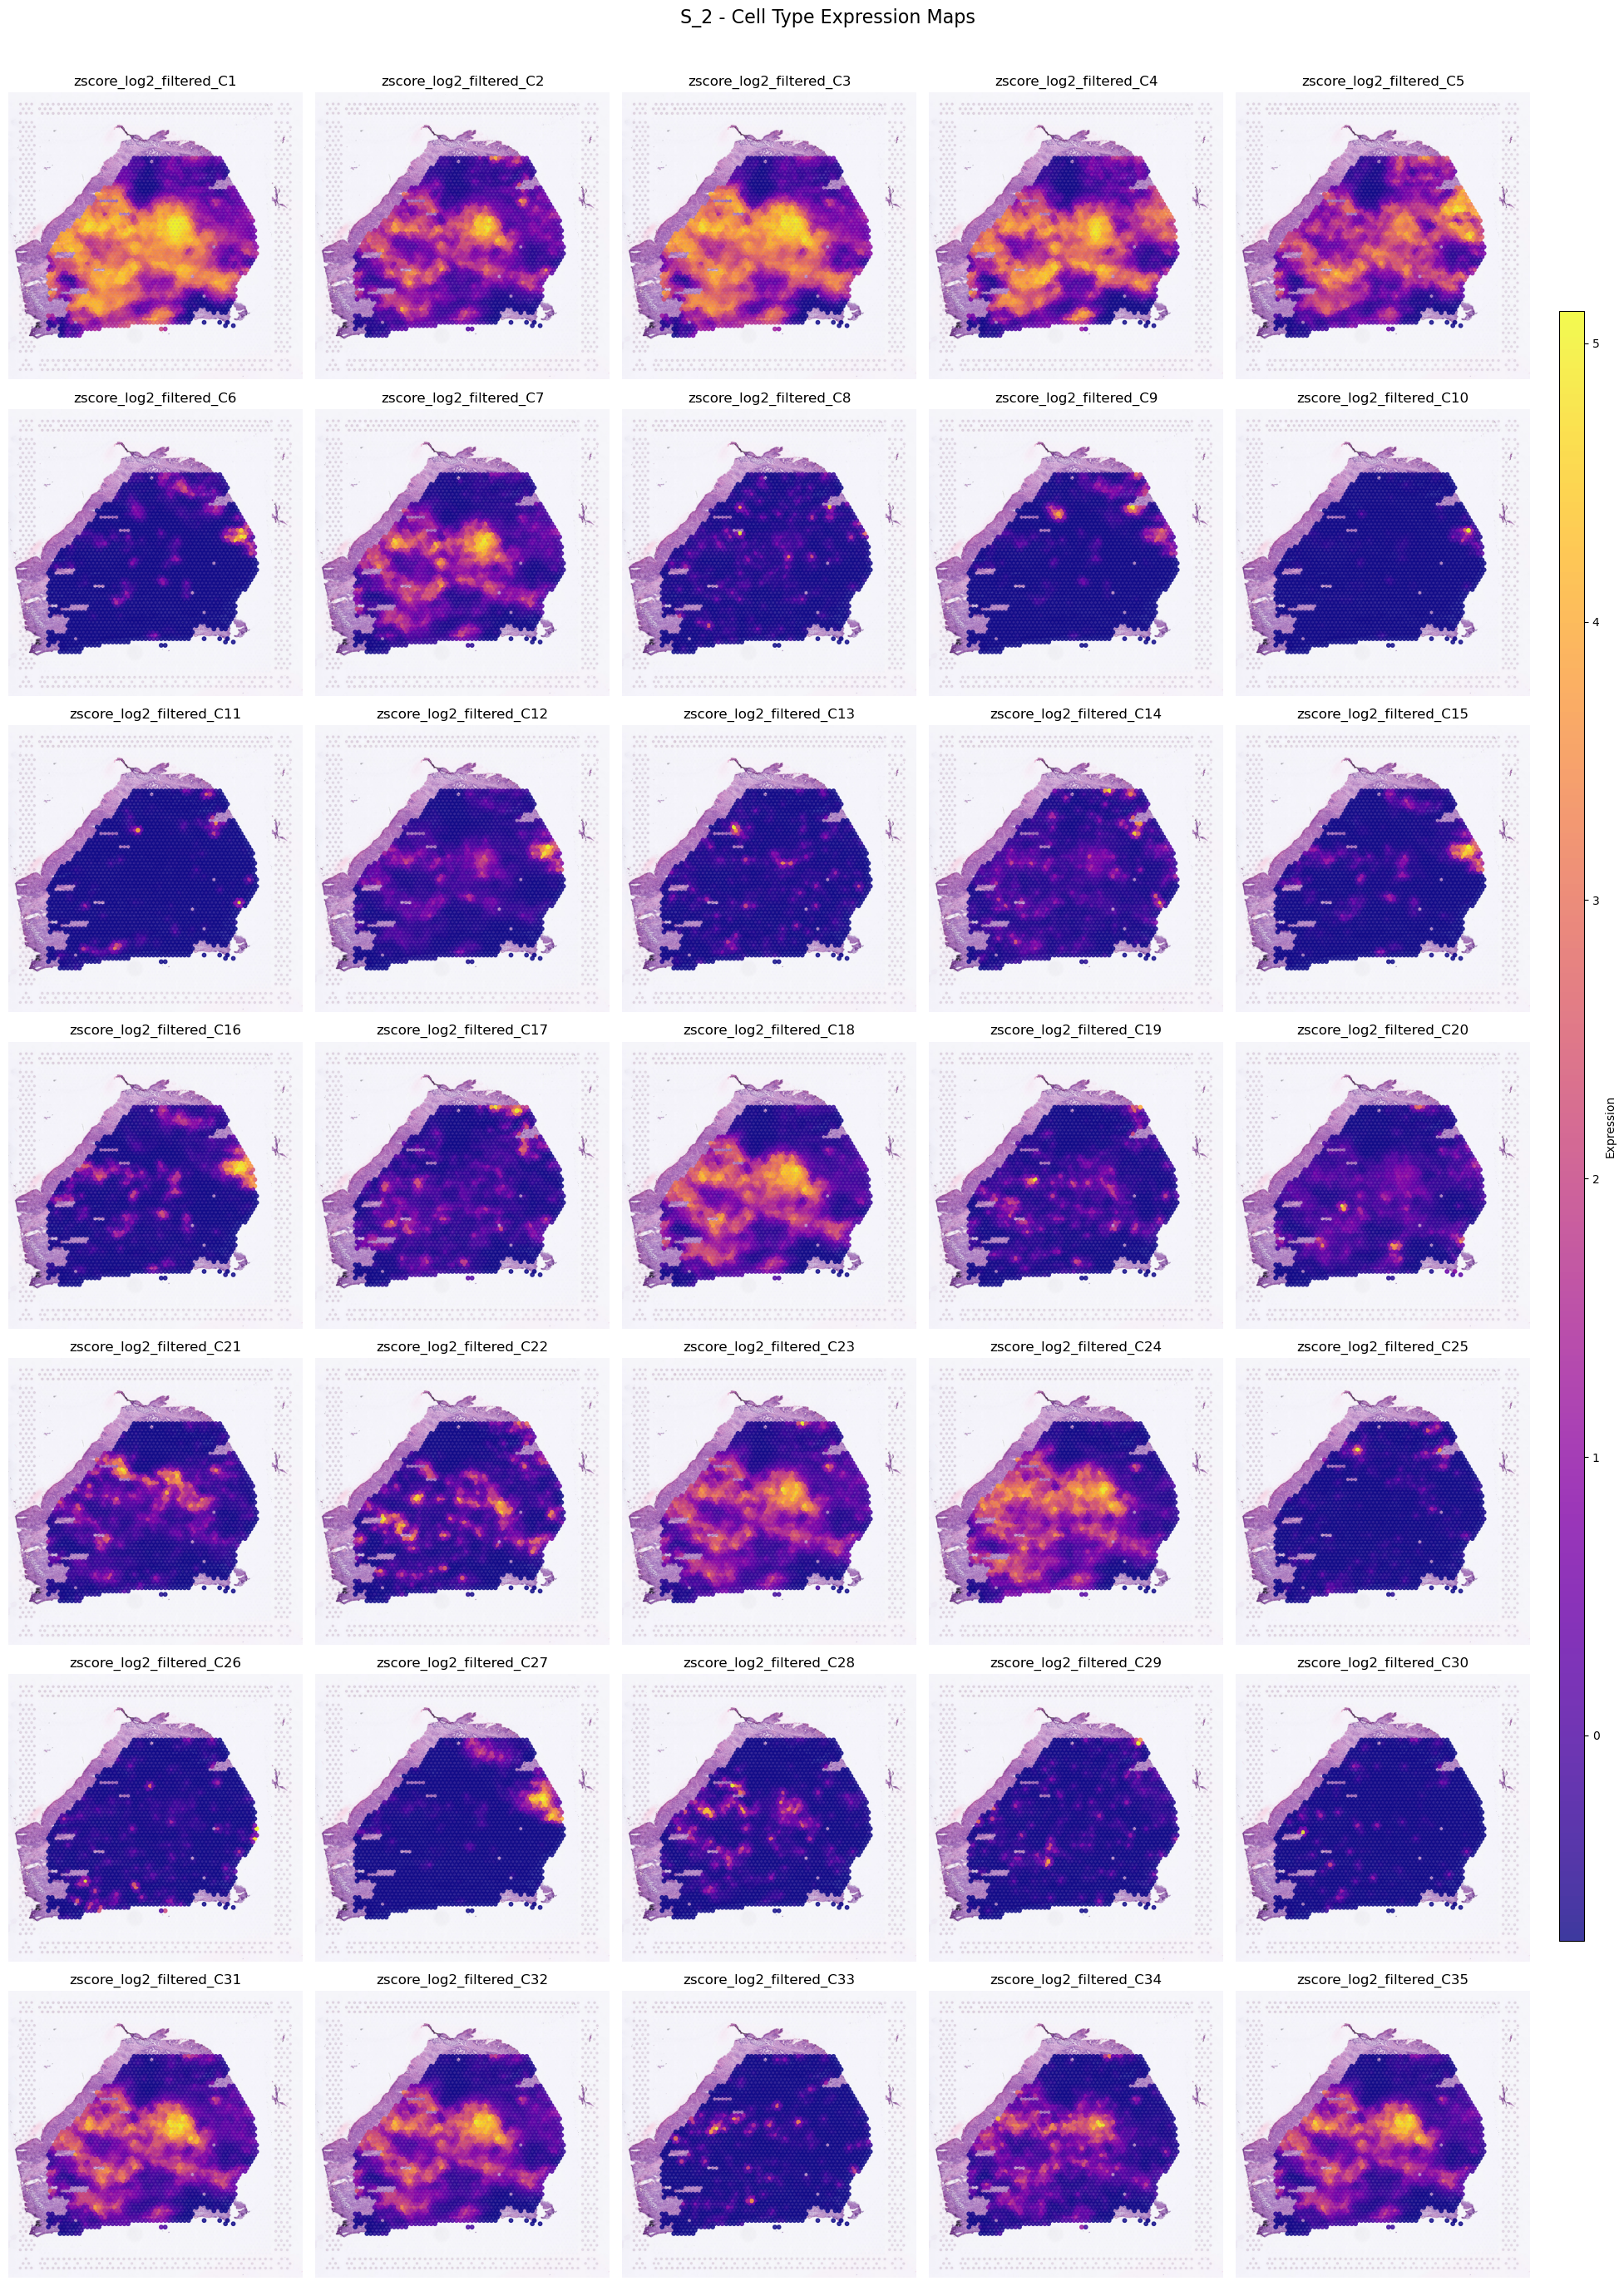

In [42]:
from python_scripts.expression_plot_utils import plot_all_celltypes_on_slide
plot_all_celltypes_on_slide(
    slide_id = "S_2",
    cell_prefix="zscore_log2_filtered_",
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path_h5="./dataset/spots-data/version-5/gu_smooth_radius30.h5",
    spot_group="log2_Train",
    image_group="Train")



Train S_1
Train S_2
Train S_3
Train S_4
Train S_5
Train S_6


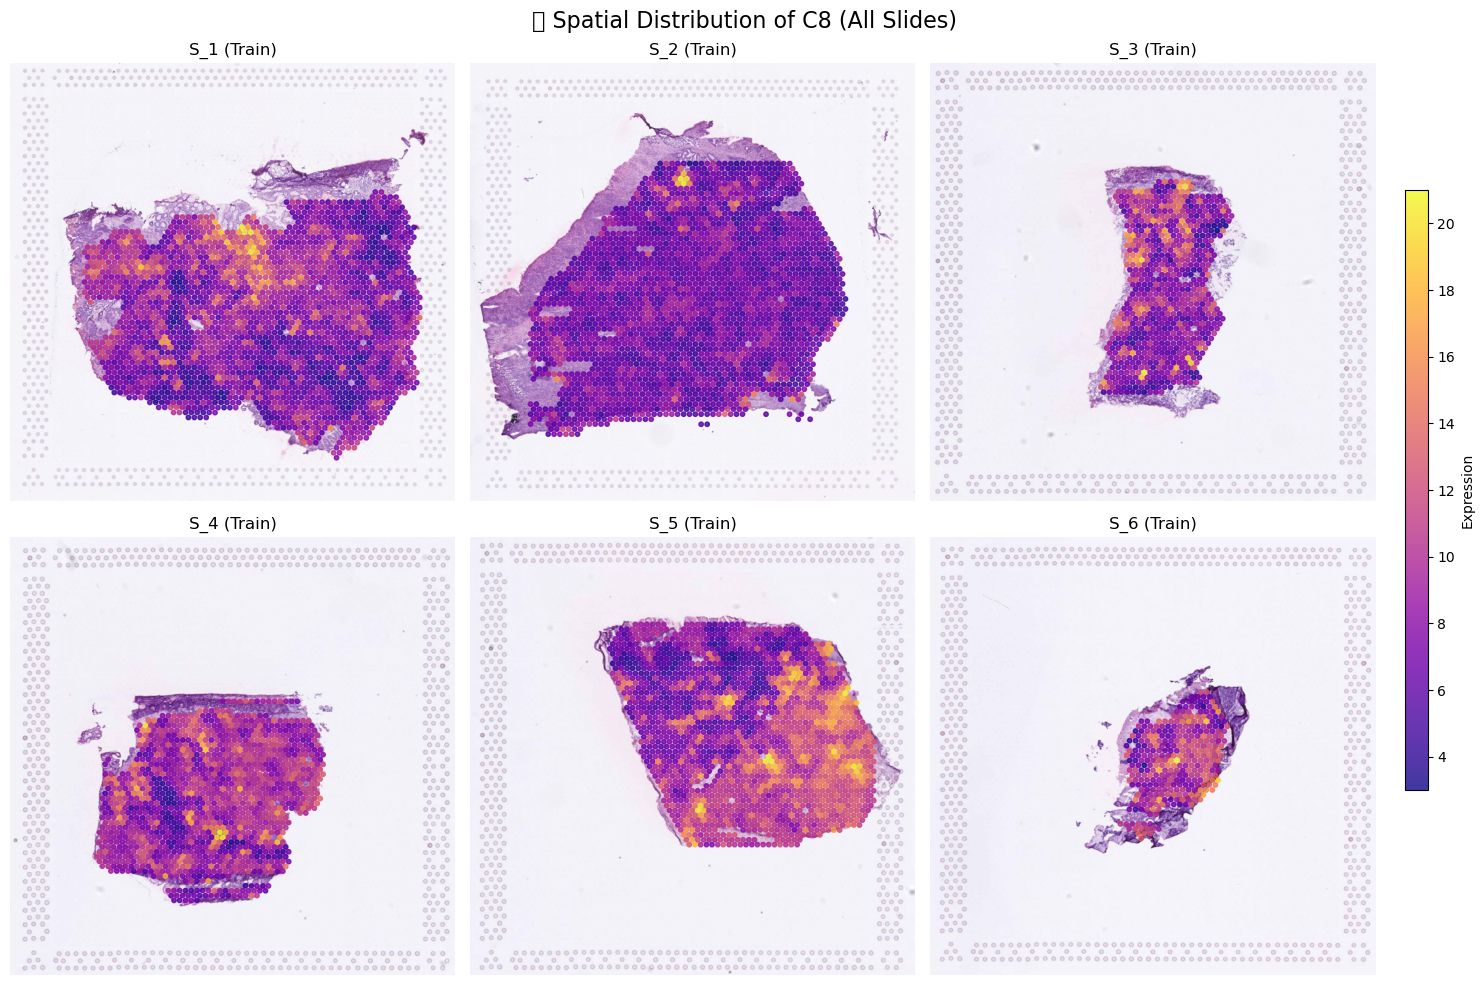

In [42]:
from python_scripts.expression_plot_utils import plot_cell_expression_all_slides
plot_cell_expression_all_slides(
    cell_short_name='C8',
    cell_prefix='rank_',
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path="dataset/spot-rank/version-2/gu_rank_radius_30.h5",
    group_name="Train"
)

# gu_smooth_processed_train_spots_log2 , log2_filtered_
# gu_smooth_processed_train_spots , zscore_log2_filtered_

In [34]:
import h5py
import numpy as np
from python_scripts.spatial_smooth import smooth_all_slides_and_save

# 先載入原本的資料（跟你之前一樣）
with h5py.File("./dataset/spot-rank/version-1/directly_rank_train_spots.h5", "r") as f:
    train_spots = f["spots/Train"]
    train_spot_tables = {
        slide: pd.DataFrame(np.array(train_spots[slide]))
        for slide in train_spots.keys()
    }

# 找出所有 cell type 欄位（z-score 後的）
cell_type_cols = [col for col in train_spot_tables["S_1"].columns if col.startswith("rank_")]

# 設定儲存路徑
save_folder = "./dataset/spot-rank/version-2/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
smoothed_path = os.path.join(save_folder, "gu_rank_radius30.h5")


smooth_all_slides_and_save(train_spot_tables, cell_type_cols, smoothed_path, radius=30)


Processing slides: 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

✅ 所有 slide 都已平滑並存成 ./dataset/spot-rank/version-2/gu_rank_radius30.h5，格式與 processed_train_spots.h5 相同！
